<a href="https://colab.research.google.com/github/JonesMartin1/DataTech-SEBE/blob/main/Monz%C3%B3n_Jones_Gu%C3%ADa_8_An%C3%A1lisis_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#importar librerias
import numpy as np
import pandas as pd
import kagglehub
import os

# Leer el dataset directamente desde la URL
path = kagglehub.dataset_download("uciml/iris")

#importar datasets para el análisis
iris = pd.read_csv(os.path.join(path, "Iris.csv"))

#comprender los datos
#visualizar las primeras filas del dataset
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [95]:
#Analizar datos disponibles
print('Información del dataset')
print(iris.info())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [96]:
#desplegar información estadística
print('Descripción del dataset')
print(iris.drop(columns=['Id']).describe())

Descripción del dataset
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [97]:
#Distribución
print('Distribución de las especies de Iris:')
print(iris.groupby('Species').size())

Distribución de las especies de Iris:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


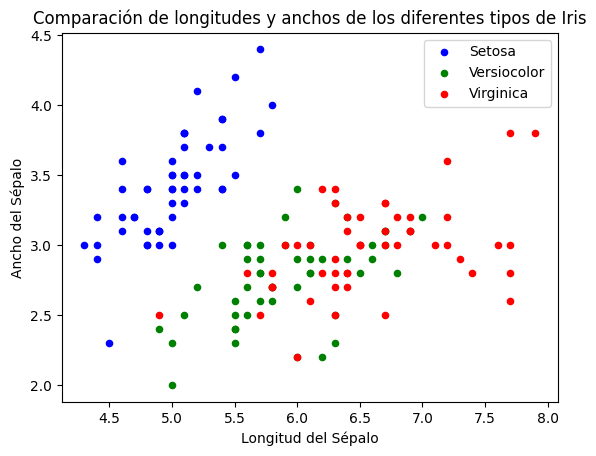

In [98]:
import matplotlib.pyplot as plt

#Gráfico sepal comparando la longitud con el anho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')

iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm',color='green',label='Versiocolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Longitud del Sépalo')
fig.set_ylabel('Ancho del Sépalo')
fig.set_title('Comparación de longitudes y anchos de los diferentes tipos de Iris')
plt.show()

In [99]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Asignar la columna Species a Y
Y = iris['Species']

#codificar variables resultados
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# codificación claiente ( hot encoded )
dummy_y = to_categorical(encoded_Y)

# Ver los primeros 10 valores codificados como números
print("Label Encoding (primeros 10 valores):")
print(encoded_Y[:10])

# Ver las primeras 5 filas del array one-hot codificado
print("One Hot Encoding (primeras 5 filas):")
print(dummy_y[:5])


Label Encoding (primeros 10 valores):
[0 0 0 0 0 0 0 0 0 0]
One Hot Encoding (primeras 5 filas):
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [100]:
# Crear un DataFrame para visualizarlo
df_encoded = pd.DataFrame({
    'Species_original': Y,
    'Label_encoded': encoded_Y,
    'OneHot_0': dummy_y[:, 0],
    'OneHot_1': dummy_y[:, 1],
    'OneHot_2': dummy_y[:, 2]
})

# Mostrar las primeras filas
print(df_encoded.head())

  Species_original  Label_encoded  OneHot_0  OneHot_1  OneHot_2
0      Iris-setosa              0       1.0       0.0       0.0
1      Iris-setosa              0       1.0       0.0       0.0
2      Iris-setosa              0       1.0       0.0       0.0
3      Iris-setosa              0       1.0       0.0       0.0
4      Iris-setosa              0       1.0       0.0       0.0


In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Variables numéricas
X = iris.drop(columns=['Species','Id'])

# Normalización
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)

# Convertir a DataFrame para visualizar
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
print("Primeras filas normalizadas:")
print(df_normalized.head())

# Estandarización
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convertir a DataFrame para visualizar
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)
print("Primeras filas estandarizadas:")
print(df_standardized.head())

Primeras filas normalizadas:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.222222      0.625000       0.067797      0.041667
1       0.166667      0.416667       0.067797      0.041667
2       0.111111      0.500000       0.050847      0.041667
3       0.083333      0.458333       0.084746      0.041667
4       0.194444      0.666667       0.067797      0.041667
Primeras filas estandarizadas:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


In [102]:
# Separación de datos
from sklearn.model_selection import train_test_split

# Modelos de clasificación
from sklearn.neural_network import MLPClassifier            # Red Neuronal Artificial
from sklearn.linear_model import LogisticRegression         # Regresión Logística
from sklearn.svm import SVC                                 # Máquina de Vectores de Soporte
from sklearn.neighbors import KNeighborsClassifier          # k-Vecinos
from sklearn.tree import DecisionTreeClassifier             # Árbol de Decisión


In [103]:
# Construyendoun archivo de datos
# Tenemos que distinguir variables evidenciales [X] de variables de respuesta [Y]

X = np.array(iris.drop(columns=['Species']))
y = np.array(iris['Species'])

#Tenemos que distinguir datos de entrenamiento y prueba utilizando la instrucción train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('{} datos de entrenamiento y {} datos de prueba'.format(X_train.shape[0], X_test.shape[0]))

120 datos de entrenamiento y 30 datos de prueba


In [104]:
# Ejecutando el algoritmo.
# Se define el algoritmo que se va a utilizar.
# Se entrena el conjunto de datos.
# Se ejecuta la predicción utilizando los datos X_test.
# Se utilizan métricas como precisión o confianza del algoritmo, optando por instrucciones tipo Score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Definir el modelo
modelo = MLPClassifier(hidden_layer_sizes=(10,4,3), max_iter=1000, random_state=100)

# 2. Entrenar el modelo
modelo.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# 4. Evaluar precisión
accuracy = modelo.score(X_test, y_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

# 5. Métricas adicionales (opcional)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo en el conjunto de prueba: 1.0
Matriz de confusión:
[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]

Reporte de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
modeloPerfecto = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1000,
    batch_size=16,
    random_state=42
)

In [106]:
modelo_softmax = MLPClassifier(
    hidden_layer_sizes=(30,),       # 1 capa oculta con 30 neuronas
    activation='logistic',          # sigmoid para permitir salida probabilística suave
    solver='adam',                  # robusto y adaptable
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

modelo_softmax.fit(X_train, y_train)

# Predicción como probabilidades (softmax)
y_prob = modelo_softmax.predict_proba(X_test)

# Predicción final (clase con mayor probabilidad)
y_pred = modelo_softmax.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
modelo_relu = MLPClassifier(
    hidden_layer_sizes=(50, 25),    # Dos capas ocultas, profundas
    activation='relu',              # ReLU en capas ocultas
    solver='adam',                  # Optimización robusta y rápida
    learning_rate_init=0.001,
    max_iter=1000,
    batch_size=16,
    random_state=42
)

modelo_relu.fit(X_train, y_train)

y_pred = modelo_relu.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [108]:
from sklearn.neural_network import MLPClassifier

# ------------------------------------------------------------------------------
# MODELO 1: Red profunda con activación ReLU
# ------------------------------------------------------------------------------

modelo_relu = MLPClassifier(
    hidden_layer_sizes=(50, 25),     # Dos capas ocultas: la primera con 50 neuronas, la segunda con 25
    activation='relu',               # ReLU (Rectified Linear Unit): permite modelar relaciones no lineales y evita el problema del gradiente desaparecido
    solver='sgd',                    # Stochastic Gradient Descent: actualiza los pesos por cada lote de entrenamiento (más lento pero flexible)
    learning_rate_init=0.00001,      # Tasa de aprendizaje muy baja, útil cuando el SGD necesita precisión al converger
    max_iter=1000,                   # Número máximo de iteraciones para entrenar el modelo
    batch_size=16,                   # Número de muestras usadas por lote para actualizar los pesos
    random_state=42                  # Semilla para asegurar reproducibilidad de resultados
)

# Uso sugerido: problemas multiclase con relaciones no lineales complejas y entrenamiento fino con control del aprendizaje


# ------------------------------------------------------------------------------
# MODELO 2: Red simple con activación sigmoide (logistic)
# ------------------------------------------------------------------------------

modelo_softmax = MLPClassifier(
    hidden_layer_sizes=(30,),        # Una sola capa oculta con 30 neuronas
    activation='logistic',           # Función sigmoide: salida en rango [0,1], permite interpretar como probabilidad (similar a softmax en binaria)
    solver='lbfgs',                  # Algoritmo de optimización cuasi-Newtoniano eficiente para datasets pequeños o medianos
    learning_rate_init=0.01,         # Tasa de aprendizaje inicial más elevada, pero no se usa directamente con lbfgs
    max_iter=1000,                   # Número máximo de iteraciones para la optimización
    random_state=42                  # Control de aleatoriedad
)

# Uso sugerido: clasificación simple o análisis probabilístico de clases, especialmente cuando el dataset es pequeño y se necesita precisión en la convergencia


# ------------------------------------------------------------------------------
# MODELO 3: Red balanceada (modelo recomendado base)
# ------------------------------------------------------------------------------

modeloPerfecto = MLPClassifier(
    hidden_layer_sizes=(20, 10),     # Red de dos capas ocultas moderadas: una con 20 y otra con 10 neuronas
    activation='relu',               # Función ReLU: buen rendimiento en tareas generales, evita saturación de gradiente
    solver='adam',                   # Optimizador adaptativo basado en momentum: rápido y efectivo en la mayoría de los casos
    learning_rate_init=0.0001,       # Tasa de aprendizaje conservadora que asegura estabilidad
    max_iter=1000,                   # Número máximo de épocas de entrenamiento
    batch_size=16,                   # Mini-batches pequeños que mejoran la generalización y reducen la varianza de actualización
    random_state=42                  # Reproducibilidad del entrenamiento
)

# Uso sugerido: tareas generales de clasificación multiclase, con buen equilibrio entre profundidad, velocidad y precisión


In [109]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# MODELO 1: ReLU con arquitectura profunda
modelo_relu = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='sgd',
                            learning_rate_init=0.00001, max_iter=1000, batch_size=16, random_state=42)
modelo_relu.fit(X_train, y_train)
y_pred_relu = modelo_relu.predict(X_test)
accuracy_relu = modelo_relu.score(X_test, y_test)
print("🔹 Modelo ReLU - Precisión:", accuracy_relu)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_relu))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_relu))


# MODELO 2: Softmax (sigmoid) con arquitectura simple
modelo_softmax = MLPClassifier(hidden_layer_sizes=(30,), activation='logistic', solver='lbfgs',
                               learning_rate_init=0.01, max_iter=1000, random_state=42)
modelo_softmax.fit(X_train, y_train)
y_pred_softmax = modelo_softmax.predict(X_test)
accuracy_softmax = modelo_softmax.score(X_test, y_test)
print("🔹 Modelo Softmax - Precisión:", accuracy_softmax)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_softmax))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_softmax))


# MODELO 3: Balanceado (modelo recomendado base)
modeloPerfecto = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam',
                               learning_rate_init=0.0001, max_iter=1000, batch_size=16, random_state=42)
modeloPerfecto.fit(X_train, y_train)
y_pred_perfecto = modeloPerfecto.predict(X_test)
accuracy_perfecto = modeloPerfecto.score(X_test, y_test)
print("🔹 Modelo Perfecto - Precisión:", accuracy_perfecto)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_perfecto))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_perfecto))


# COMPARATIVA FINAL
print("📊 COMPARACIÓN DE PRECISIONES")
print(f"Modelo ReLU       : {accuracy_relu:.4f}")
print(f"Modelo Softmax    : {accuracy_softmax:.4f}")
print(f"Modelo Perfecto   : {accuracy_perfecto:.4f}")


🔹 Modelo ReLU - Precisión: 0.9
Matriz de confusión:
[[12  0  0]
 [ 0  7  3]
 [ 0  0  8]]
Reporte de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.70      0.82        10
 Iris-virginica       0.73      1.00      0.84         8

       accuracy                           0.90        30
      macro avg       0.91      0.90      0.89        30
   weighted avg       0.93      0.90      0.90        30

🔹 Modelo Softmax - Precisión: 1.0
Matriz de confusión:
[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
Reporte de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg      

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [110]:
# Crear el DataFrame con los resultados obtenidos para cada modelo
data = {
    'ReLU':         [0.87, 0.86, 0.83, 0.87],
    'Softmax':      [1.00, 1.00, 1.00, 1.00],
    'Perfecto':     [1.00, 1.00, 1.00, 1.00]
}

# Definir los nombres de las métricas
metricas = ['Accuracy', 'F1-Score', 'Recall', 'Precision']

# Crear el DataFrame
df = pd.DataFrame(data, index=metricas)

# Calcular y agregar columnas de media y desviación estándar
df['Media (𝑋̄)'] = df.mean(axis=1).round(2)
df['Desviación Estándar (σ²)'] = df.std(axis=1).round(2)

# Mostrar el DataFrame
print("📊 Tabla comparativa de desempeño de los modelos MLP:\n")
display(df)


📊 Tabla comparativa de desempeño de los modelos MLP:



,ReLU,Softmax,Perfecto,Media (𝑋̄),Desviación Estándar (σ²)
Accuracy,0.87,1.0,1.0,0.96,0.06
F1-Score,0.86,1.0,1.0,0.95,0.07
Recall,0.83,1.0,1.0,0.94,0.08
Precision,0.87,1.0,1.0,0.96,0.06
